In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

Matplotlib is building the font cache; this may take a moment.


ModuleNotFoundError: No module named 'pandas_datareader'

In [2]:
!pip install pandas_datareader


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [8]:
pip install yfinance


  Using cached cryptography-40.0.2-cp36-abi3-win_amd64.whl (2.6 MB)


In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

start = '2010-01-01'
end = '2020-12-31'

df = yf.download('AAPL', start=start, end=end)
print(df.head())


[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.461977  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.473148  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.370184  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.358407  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.400682  447610800


In [10]:
print(df.tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-12-23  132.160004  132.429993  130.779999  130.960007  128.349167   
2020-12-24  131.320007  133.460007  131.100006  131.970001  129.339035   
2020-12-28  133.990005  137.339996  133.509995  136.690002  133.964920   
2020-12-29  138.050003  138.789993  134.339996  134.869995  132.181198   
2020-12-30  135.580002  135.990005  133.399994  133.720001  131.054153   

               Volume  
Date                   
2020-12-23   88223700  
2020-12-24   54930100  
2020-12-28  124486200  
2020-12-29  121047300  
2020-12-30   96452100  


In [12]:
df=df.reset_index()
print(df.head())

   index       Date      Open      High       Low     Close  Adj Close  \
0      0 2010-01-04  7.622500  7.660714  7.585000  7.643214   6.461977   
1      1 2010-01-05  7.664286  7.699643  7.616071  7.656429   6.473148   
2      2 2010-01-06  7.656429  7.686786  7.526786  7.534643   6.370184   
3      3 2010-01-07  7.562500  7.571429  7.466071  7.520714   6.358407   
4      4 2010-01-08  7.510714  7.571429  7.466429  7.570714   6.400682   

      Volume  
0  493729600  
1  601904800  
2  552160000  
3  477131200  
4  447610800  


In [13]:
df=df.drop(['Date','Adj Close'], axis=1)
print(df.head())

   index      Open      High       Low     Close     Volume
0      0  7.622500  7.660714  7.585000  7.643214  493729600
1      1  7.664286  7.699643  7.616071  7.656429  601904800
2      2  7.656429  7.686786  7.526786  7.534643  552160000
3      3  7.562500  7.571429  7.466071  7.520714  477131200
4      4  7.510714  7.571429  7.466429  7.570714  447610800


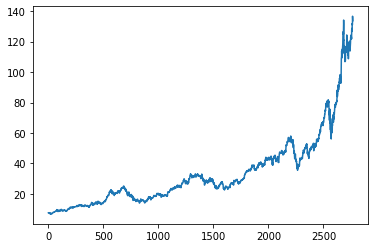

In [15]:
plt.plot(df.Close)

In [16]:
print(df)

      index        Open        High         Low       Close     Volume
0         0    7.622500    7.660714    7.585000    7.643214  493729600
1         1    7.664286    7.699643    7.616071    7.656429  601904800
2         2    7.656429    7.686786    7.526786    7.534643  552160000
3         3    7.562500    7.571429    7.466071    7.520714  477131200
4         4    7.510714    7.571429    7.466429    7.570714  447610800
...     ...         ...         ...         ...         ...        ...
2763   2763  132.160004  132.429993  130.779999  130.960007   88223700
2764   2764  131.320007  133.460007  131.100006  131.970001   54930100
2765   2765  133.990005  137.339996  133.509995  136.690002  124486200
2766   2766  138.050003  138.789993  134.339996  134.869995  121047300
2767   2767  135.580002  135.990005  133.399994  133.720001   96452100

[2768 rows x 6 columns]


In [17]:
ma100=df.Close.rolling(100).mean()
print(ma100)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    118.000475
2764    118.223525
2765    118.489800
2766    118.699475
2767    118.925550
Name: Close, Length: 2768, dtype: float64


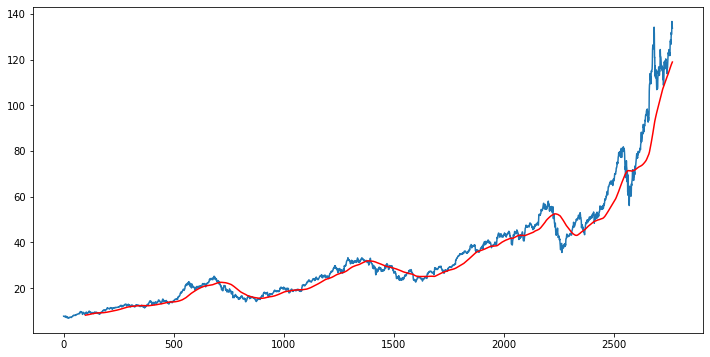

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763     98.809175
2764     99.158737
2765     99.494725
2766     99.866312
2767    100.218837
Name: Close, Length: 2768, dtype: float64


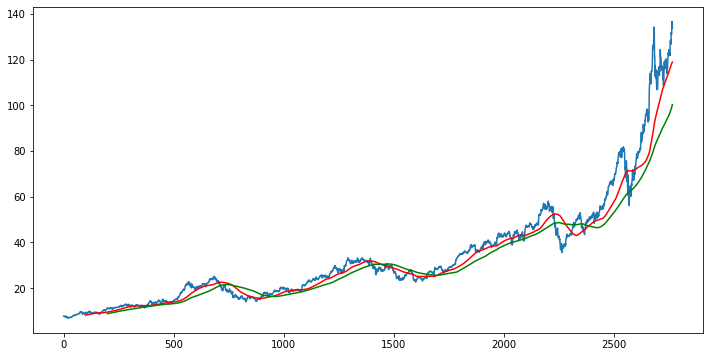

In [20]:
ma200=df.Close.rolling(200).mean()
print(ma200)
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')


In [21]:
print(df.shape)

(2768, 6)


In [23]:
#splitting data into training and testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1937, 1)
(831, 1)


In [24]:
print(data_training.head())
print(data_testing.head())

      Close
0  7.643214
1  7.656429
2  7.534643
3  7.520714
4  7.570714
          Close
1937  39.912498
1938  39.570000
1939  39.970001
1940  39.667500
1941  39.682499


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [26]:
data_training_array=scaler.fit_transform(data_training)
print(data_training_array)

[[0.02296349]
 [0.0233504 ]
 [0.01978458]
 ...
 [0.96032627]
 [0.98133429]
 [0.97664957]]


In [29]:
#time series analysis model applied
x_train=[]
y_train=[]


for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)

In [31]:
#ML Model Building
from keras.layers import Dense,Dropout,LSTM
from keras.models import sequentials

ModuleNotFoundError: No module named 'keras'

In [33]:
pip install tensorflow


In [34]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [36]:
#ML Model Building
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [37]:
#LSTM model
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))

model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))

model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))

model.add(Dropout(0.4))


model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))


In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [39]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
58/58 [==============================] - 30s 382ms/step - loss: 0.0473
Epoch 2/50
58/58 [==============================] - 22s 378ms/step - loss: 0.0086
Epoch 3/50
58/58 [==============================] - 22s 380ms/step - loss: 0.0075
Epoch 4/50
58/58 [==============================] - 22s 377ms/step - loss: 0.0068
Epoch 5/50
58/58 [==============================] - 19s 332ms/step - loss: 0.0063
Epoch 6/50
58/58 [==============================] - 22s 373ms/step - loss: 0.0063
Epoch 7/50
58/58 [==============================] - 22s 374ms/step - loss: 0.0061
Epoch 8/50
58/58 [==============================] - 22s 378ms/step - loss: 0.0062
Epoch 9/50
58/58 [==============================] - 22s 381ms/step - loss: 0.0069
Epoch 10/50
58/58 [==============================] - 22s 379ms/step - loss: 0.0044
Epoch 11/50
58/58 [==============================] - 22s 380ms/step - loss: 0.0052
Epoch 12/50
58/58 [==============================] - 22s 374ms/step - loss: 0.0043
Epoch 13/50
5

In [41]:
model.save('keras_model.h5')

In [42]:
data_testing.head()

,Close
1937,39.912498
1938,39.570000
1939,39.970001
1940,39.667500
1941,39.682499


In [43]:
past_100_days=data_training.tail(100)

In [44]:
final_df=past_100_days.append(data_testing,ignore_index=True)

In [46]:
final_df.head()

,Close
0,35.567501
1,35.910000
2,36.132500
3,35.919998
4,35.947498


In [47]:
input_data=scaler.fit_transform(final_df)
input_data

array([[1.97745334e-04],
       [3.58404460e-03],
       [5.78390957e-03],
       [3.68289840e-03],
       [3.95479352e-03],
       [3.60874862e-03],
       [1.08510253e-02],
       [1.31497441e-02],
       [1.20374596e-02],
       [1.07274298e-02],
       [1.67338264e-02],
       [2.67444246e-02],
       [2.91667767e-02],
       [2.73623646e-02],
       [2.90678851e-02],
       [3.43821920e-02],
       [3.33934653e-02],
       [3.28249711e-02],
       [1.99223803e-02],
       [2.55826944e-02],
       [2.68680202e-02],
       [2.91667767e-02],
       [2.86971362e-02],
       [2.75601100e-02],
       [2.88701398e-02],
       [2.82274958e-02],
       [2.83757953e-02],
       [2.61264846e-02],
       [2.71646193e-02],
       [3.27755253e-02],
       [2.90184394e-02],
       [3.03037652e-02],
       [3.25777800e-02],
       [3.16385368e-02],
       [1.67832345e-02],
       [7.98377455e-03],
       [1.08757293e-02],
       [7.34113050e-03],
       [5.19067357e-03],
       [1.97745334e-04],


In [48]:
input_data.shape

(931, 1)

In [49]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [50]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [51]:
print(x_test.shape)
print(y_test.shape)

(831, 100, 1)
(831,)


In [52]:
#making prediction

y_predicted=model.predict(x_test)

In [53]:
y_predicted.shape

(831, 1)

In [54]:
y_test

array([0.04315691, 0.03977061, 0.04372544, 0.0407346 , 0.0408829 ,
       0.03430804, 0.02768371, 0.02397607, 0.02066392, 0.02706577,
       0.02975997, 0.02741181, 0.02948808, 0.02872184, 0.03037791,
       0.02790615, 0.03262723, 0.03240478, 0.03373951, 0.03388781,
       0.03549448, 0.034135  , 0.03658206, 0.04372544, 0.04518377,
       0.04342881, 0.03408556, 0.03475294, 0.0345552 , 0.03685395,
       0.03514843, 0.03762019, 0.05156092, 0.06063227, 0.06636674,
       0.06105247, 0.06406802, 0.07491904, 0.07924462, 0.0806288 ,
       0.08416344, 0.0832736 , 0.08028276, 0.07855253, 0.07205179,
       0.06646563, 0.07145859, 0.06911039, 0.0686902 , 0.07650097,
       0.08099959, 0.08102429, 0.07884913, 0.07632796, 0.06745432,
       0.07331241, 0.071335  , 0.0682453 , 0.06784981, 0.06629259,
       0.06705886, 0.06718242, 0.07533924, 0.07294163, 0.07435055,
       0.07422695, 0.07855253, 0.08460834, 0.07996142, 0.07949181,
       0.08112315, 0.08112315, 0.07014856, 0.07022271, 0.07140

In [55]:
scaler.scale_

array([0.00988704])

In [56]:
scale_factor=1/0.00988704
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

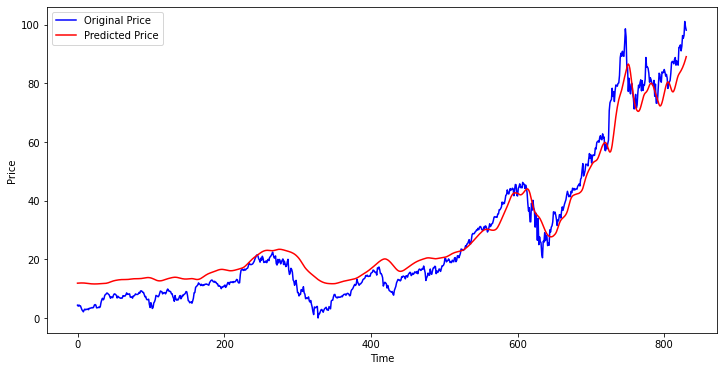

In [58]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show